### We examine the relations between forces, encoder counts, steps, and positions
This test was done on Thursday night (3/4/20)

In [79]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<Figure size 432x288 with 0 Axes>

In [80]:
start = Time('2020-03-05T22:27:00') #this is UTC
end = Time('2020-03-05T22:38:00') 

In [81]:
def readSqXlsx(c1,c2):
    wb = load_workbook(filename='M2basicTest.xlsx', read_only=True)
    ws = wb['Sheet1']
    data_rows = []
    for row in ws[c1:c2]:
        data_cols = []
        for cell in row:
            data_cols.append(cell.value)
        data_rows.append(data_cols)
    return np.array(data_rows)
def getSlope(x, y):
    return np.mean(y[1:]-y[:-1])/np.mean(x[1:]-x[:-1])
def getDelta(y):
    return np.mean(y[1:]-y[:-1])

#### We recorded some data in the Excel file by hand. Let's look at those first
Open loop: the input was B1 stroke 

In [82]:
aa = readSqXlsx('C3','N8')

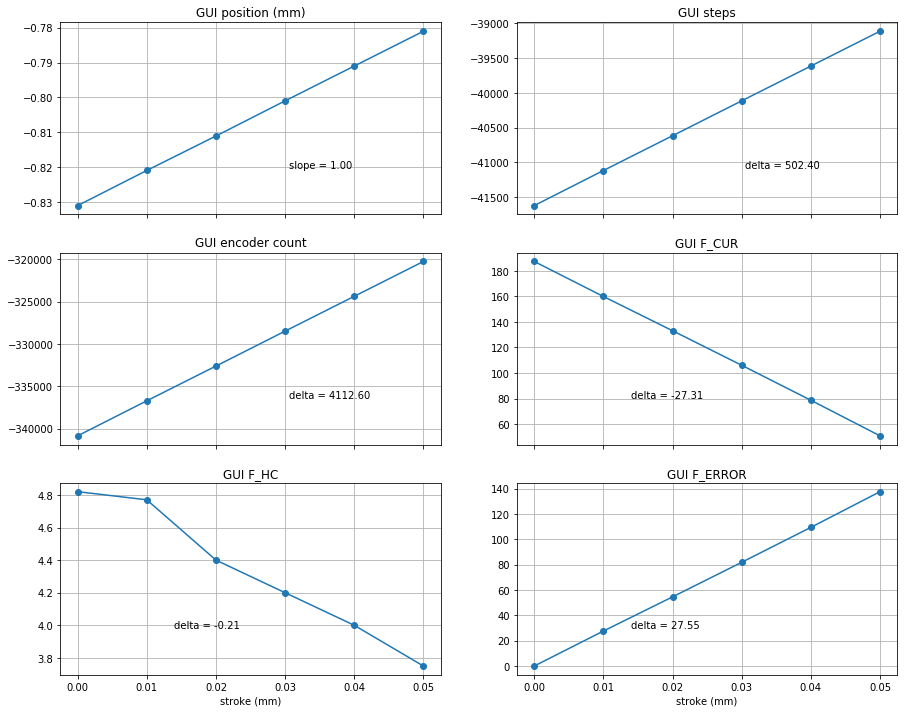

In [83]:
fig, ax = plt.subplots(3,2, figsize=(15, 3*4), sharex=True)
inmm = aa[:,0]
guimm = aa[:,1]
ax[0][0].plot(inmm, guimm,'-o')
ax[0][0].text(0.6, 0.24, "slope = %.2f"%getSlope(inmm, guimm), color = 'black', transform=ax[0][0].transAxes)
ax[0][0].grid()
ax[0][0].set_title('GUI position (mm)');

guisteps = aa[:,2]
ax[0][1].plot(inmm, guisteps,'-o')
ax[0][1].text(0.6, 0.24, "delta = %.2f"%getDelta(guisteps), color = 'black', transform=ax[0][1].transAxes)
ax[0][1].grid()
ax[0][1].set_title('GUI steps');

guiec = aa[:,3]
ax[1][0].plot(inmm, guiec,'-o')
ax[1][0].text(0.6, 0.24, "delta = %.2f"%getDelta(guiec), color = 'black', transform=ax[1][0].transAxes)
ax[1][0].grid()
ax[1][0].set_title('GUI encoder count');

#F_cmd in GUI does not change

guifcur = aa[:,5]
ax[1][1].plot(inmm, guifcur,'-o')
ax[1][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guifcur), color = 'black', transform=ax[1][1].transAxes)
ax[1][1].grid()
ax[1][1].set_title('GUI F_CUR');

guifhc = aa[:,6]
ax[2][0].plot(inmm, guifhc,'-o')
ax[2][0].text(0.3, 0.24, "delta = %.2f"%getDelta(guifhc), color = 'black', transform=ax[2][0].transAxes)
ax[2][0].set_xlabel('stroke (mm)')
ax[2][0].set_title('GUI F_HC');
ax[2][0].grid()

guife = aa[:,7]
ax[2][1].plot(inmm, guife,'-o')
ax[2][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guife), color = 'black', transform=ax[2][1].transAxes)
ax[2][1].set_xlabel('stroke (mm)')
ax[2][1].grid()
ax[2][1].set_title('GUI F_ERROR');

#EFD encoder position is same as GUI position.
#EFD F_CUR is same as GUI F_CUR

Questions:
* EFD steps do not seem to change, is that because of digits we were able to read from Chronograf? Does this match to anything in the GUI?
* F_CMD seems to be LUT force. It doesn't change in this process. F_CUR is decreasing, is that the force being applied? If it gets smaller, F_HC needs to get bigger on every actuator, but it decreases. Why. Need to check all forces from EFD or bin file.

In [84]:
client = EfdClient('summit_efd')
csc_index = 1

In [85]:
start.tai

<Time object: scale='tai' format='isot' value=2020-03-05T22:27:37.000>

In [86]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.axialActuatorAbsolutePositionSteps', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,axialAbsolutePositionSteps0,axialAbsolutePositionSteps1,axialAbsolutePositionSteps10,axialAbsolutePositionSteps11,axialAbsolutePositionSteps12,axialAbsolutePositionSteps13,axialAbsolutePositionSteps14,axialAbsolutePositionSteps15,axialAbsolutePositionSteps16,axialAbsolutePositionSteps17,...,axialAbsolutePositionSteps71,axialAbsolutePositionSteps8,axialAbsolutePositionSteps9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:27:00.036000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562632,1.583447e+09
2020-03-05 22:27:00.084000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562641,1.583447e+09
2020-03-05 22:27:00.134000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562650,1.583447e+09
2020-03-05 22:27:00.184000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562659,1.583447e+09
2020-03-05 22:27:00.236000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562670,1.583447e+09


In [87]:
df.tail()

,axialAbsolutePositionSteps0,axialAbsolutePositionSteps1,axialAbsolutePositionSteps10,axialAbsolutePositionSteps11,axialAbsolutePositionSteps12,axialAbsolutePositionSteps13,axialAbsolutePositionSteps14,axialAbsolutePositionSteps15,axialAbsolutePositionSteps16,axialAbsolutePositionSteps17,...,axialAbsolutePositionSteps71,axialAbsolutePositionSteps8,axialAbsolutePositionSteps9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:37:59.788000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682139,1.583448e+09
2020-03-05 22:37:59.840000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682148,1.583448e+09
2020-03-05 22:37:59.890000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682157,1.583448e+09
2020-03-05 22:37:59.939000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682166,1.583448e+09
2020-03-05 22:37:59.989000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682175,1.583448e+09


### Answer to first questin above: Not sure what is going on. EFD does show this is -316 everywhere.

In [88]:
df = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,axialForceMeasured0,axialForceMeasured1,axialForceMeasured10,axialForceMeasured11,axialForceMeasured12,axialForceMeasured13,axialForceMeasured14,axialForceMeasured15,axialForceMeasured16,axialForceMeasured17,...,axialForceMeasured71,axialForceMeasured8,axialForceMeasured9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:27:00.034000+00:00,187.329651,187.896790,189.828430,191.945404,187.833160,189.062744,187.264053,189.805222,190.257690,184.900726,...,251.830734,183.678207,183.826111,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562630,1.583447e+09
2020-03-05 22:27:00.082000+00:00,187.239090,187.927277,189.838623,191.955521,187.787247,189.062744,187.258987,189.800125,190.191605,184.865326,...,251.835754,183.729187,183.851501,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562639,1.583447e+09
2020-03-05 22:27:00.132000+00:00,187.344757,187.917114,189.940475,191.980835,187.751541,189.093170,187.304489,189.779785,190.115341,184.789490,...,251.785461,183.871918,183.917511,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562648,1.583447e+09
2020-03-05 22:27:00.182000+00:00,187.299469,187.932358,189.823349,192.071960,187.802551,189.072891,187.284271,189.810303,190.257690,184.809708,...,251.740204,183.734283,184.049515,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562657,1.583447e+09
2020-03-05 22:27:00.234000+00:00,187.329651,187.896790,189.818253,191.990967,187.705627,189.032318,187.264053,189.835739,190.196686,184.850159,...,251.775406,183.749573,183.907349,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562668,1.583447e+09


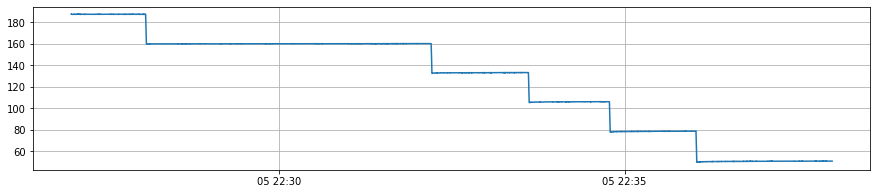

In [89]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.axialForceMeasured0)
plt.grid();
#forces on B1 are consistent between EFD and GUI

### if these are indeed the total forces measured, the sum should not change during this experiement.

In [90]:
print('beginning total = %.2f, ending total = %.2f'%(sum([df['axialForceMeasured%d'%i][0] for i in range(72)]), 
                     sum([df['axialForceMeasured%d'%i][-1] for i in range(72)])))
#LTS-107, sec 3.8.1 specifies M2 mirror mass budget ass 1600kg
print('mass budget = %.2f'%(1600*9.8))

beginning total = 15578.19, ending total = 15576.70
mass budget = 15680.00


In [91]:
mat = scipy.io.loadmat('mat/0305/CellTelemetry_2020-03-05_203926_002.mat')
print(mat['data'].dtype.names)
mdata = mat['data']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}
t = [datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']]
t = np.array([ti+ timedelta(hours=4, minutes=3, seconds=-5) for ti in t]) #convert to utc, 4 hours ahead of Rochester
#The timestamps in the EFD and those in the binary files have a ~3 minutes offset (after considering time zones). 
#Could that be because of clock synchronization? between server and cRIO, for example?
#Te-Wei: No, both are from the server. There are additional processing after writing to binary, 
# and before data is sent to SAL.
#Bo: But, how come binary timestamps are earlier than EFD private_sndStamp. 
# The latter is consistent with clocks on Bo's laptop with accuracy of 1 minute.
columns = [n for n, v in ndata.items()]
nonHP = [i for i in range(78) if i+1 not in ndata['hp'][0,:]]
nonHPa = [i for i in range(72) if i+1 not in ndata['hp'][0,:]] #a for axial actuator only

def insertHPColumns(a):
    [n1, n2] = a.shape
    b = np.zeros((n1, n2+6))
    ii = 0
    for i in range(n2+6):
        if i in nonHP:
            b[:,i] = a[:,ii]
            ii += 1
        else:
            b[:,i] = 0
    return b

ndata['f_hp'] = insertHPColumns(ndata['f_hp'])
ndata['f_error'] = insertHPColumns(ndata['f_error'])
#for i in [5,15,25]:
#    ndata['f_hp'][:,i] = ndata['f_cmd'][:,i] - ndata['force'][:,i] - ndata['f_error'][:,i]

('time_delta', 'comm_cntr', 'ilc_status', 'encoder', 'force', 'disp_sensors', 'temp_sensors', 'inclinometer', 'step_cmd', 'inc_cal', 'elevation_ts_i', 'elevation_ts_u', 'elevation_ang', 'el_status', 'disp_proc', 'disp_status', 'temp_proc', 'temp_status', 'hp', 'f_e', 'f_0', 'f_a', 'f_f', 'T_u', 'T_x', 'T_y', 'T_r', 'f_hp', 'f_cmd', 'f_error', 'f_delta', 'f_cmd_wrd', 'mtr_voltage', 'comm_voltage', 'mtr_current', 'comm_current', 'dig_input', 'dig_output', 'mtr_voltage_proc', 'comm_voltage_proc', 'mtr_current_proc', 'comm_current_proc', 'time', 'timestamp')


In [92]:
# we could form a pandas dataframe using the mat data. But ndata can be just good enough. So we skip this.
#newcolumns = []
#for c in columns:
#    nc = ndata[c].shape[1]
#    if nc==1:
#        newcolumns.append(c)
#    else:
#        for i in range(nc):
#            newcolumns.append('%s_%d'%(c,i+1))
# now make a data frame, setting the time stamps as the index
#dfm = pd.DataFrame(np.concatenate([ndata[c] for c in columns], axis=1),
#                  index=[datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']],
#                  columns=newcolumns)

In [93]:
ndata['hp']
#these indices start from 1. So, A2,A4, A6 are hardpoints

array([[ 6, 16, 26, 74, 76, 78],
       [ 6, 16, 26, 74, 76, 78],
       [ 6, 16, 26, 74, 76, 78],
       ...,
       [ 6, 16, 26, 74, 76, 78],
       [ 6, 16, 26, 74, 76, 78],
       [ 6, 16, 26, 74, 76, 78]], dtype=uint8)

In [94]:
#This starting time is now consistent with binary file name as well
t[0]

datetime.datetime(2020, 3, 5, 22, 19, 27, 730000)

In [95]:
nn = len(t)
print('%d, time duration = %.0f minutes'%(nn, nn/20/60))

59999, time duration = 50 minutes


In [96]:
# cut out only the time period we are interested in
idx = (t>start) & (t<end)
data = {}
for n, v in ndata.items():
    if len(v.shape)>1:
        data[n] = v[idx,:]
    else:
        data[n] = v[idx]
t = t[idx]

### Now EFD force data match the binary force

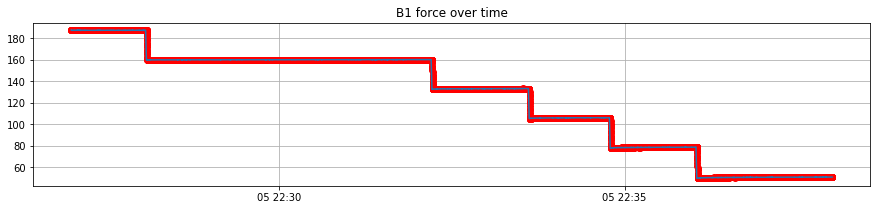

In [97]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data['force'][:,0],'-ro')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.axialForceMeasured0)
plt.title('B1 force over time')
plt.grid();

#### All actuators forces, EFD vs. binary, over 5s

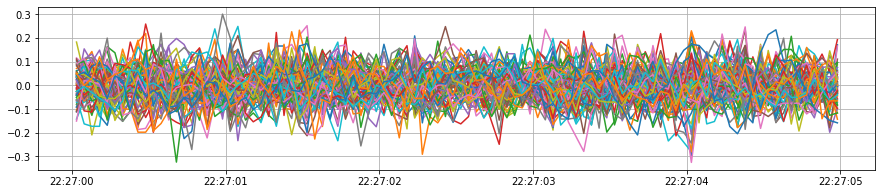

In [98]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    plt.plot(t[:100], data['force'][:100,i]-np.array(df['axialForceMeasured%d'%i][:100]))
plt.grid();

The FEA coordinate system is
<img src="M2_FEA_RCS.png">

In [99]:
aa = np.loadtxt('../github/data/M2_1um_72_force.txt')
# to have +x going to right, and +y going up, we need to transpose and reverse x and y
xact = -aa[:,2]
yact = -aa[:,1]
#actLabels = [i+10 for i in range(72)]

415.1530499185012 396.8402490709876


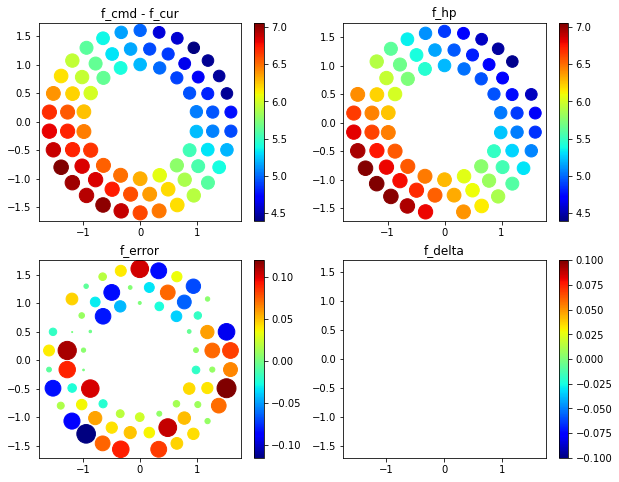

In [100]:
def plotAllForces(data, col, k1=30, k2=30, k3=3000, k4=3000):
    fig, ax = plt.subplots(2,2, figsize=(10,8))
    aa = data['f_cmd'][col,:72]- data['force'][col,:72] 
    img = ax[0][0].scatter(xact, yact, c=aa, s=abs(aa)*k1)
    ax[0][0].set_title('f_cmd - f_cur')
    fig.colorbar(img, ax=ax[0][0])
    y1 = min(aa)
    y2 = max(aa)

    aa = data['f_hp'][col,:72]
    img = ax[0][1].scatter(xact, yact, c=aa, s=abs(aa)*k2, vmin=y1, vmax=y2)
    ax[0][1].set_title('f_hp')
    fig.colorbar(img, ax=ax[0][1])

    aa = data['f_error'][col,:72]
    img = ax[1][0].scatter(xact, yact, c=aa, s=abs(aa)*k3)
    ax[1][0].set_title('f_error')
    fig.colorbar(img, ax=ax[1][0])

    aa = data['f_delta'][col,:72]
    img = ax[1][1].scatter(xact, yact, c=aa, s=abs(aa)*k4)
    ax[1][1].set_title('f_delta')
    fig.colorbar(img, ax=ax[1][1])


    ax[0][0].axis('equal')
    ax[0][1].axis('equal')
    ax[1][0].axis('equal')
    ax[1][1].axis('equal')

    sumdiff = sum(data['f_cmd'][0,:72]- data['force'][0,:72] )
    sumfhp = sum(data['f_hp'][0,:72])
    print(sumdiff, sumfhp)
    
plotAllForces(data,0)

### B26 force is smaller than B6, B16. that is why the above HPFC shown above is needed.

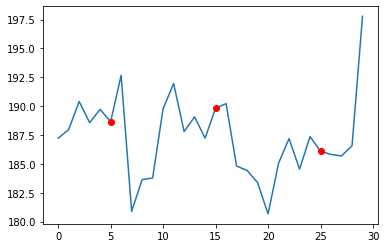

In [104]:
plt.plot(data['force'][0,:30])
plt.plot([5,15,25], data['force'][0,[5,15,25]], 'ro');

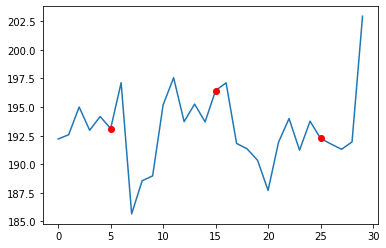

In [105]:
plt.plot(data['f_cmd'][0,:30])
plt.plot([5,15,25], data['f_cmd'][0,[5,15,25]], 'ro');

In [108]:
def getFxyzMxyz(F, xact, yact, R_tangent):
    '''
    input: force vector with 78 force values
    output: net forces Fx,Fy,Fz, net moments Mx, My, Mz
    '''
    Fz = sum(F[:72])
    Fx = F[72] - F[75] + (F[73]-F[74]-F[76]+F[77])*0.5
    Fy = (-F[73]-F[74]+F[76]+F[77])*1.732/2
    Mx = sum(F[:72]*yact)
    My = sum(-F[:72]*xact)
    Mz = sum(F[72:])*R_tangent
    
    return Fx, Fy, Fz, Mx, My, Mz
R_tangent = 1.71 #use M2 outer radius for now; in meter
Fx, Fy, Fz, Mx, My, Mz = getFxyzMxyz(data['force'][0,:], xact,yact, R_tangent)
print('%.2f, %.2f, %.2f, %.2f, %.2f, %.2f'%(Fx, Fy, Fz, Mx, My, Mz))

-36.51 122.97 15578.48 60.73 -28.49 -58.62


## now let us try to understand the forces
* from a03_LUT_0.ipynb, it is clear that f_cmd is the commanded forces (LUT force in our case here, since we do not command additional forces. Later we will know that additional commanded forces go into f_delta)
* based on the variable names, and how f_cur (simply called "force" in the binary) responds to additional forces in a04_FB.ipynb, we believe f_cur is the actual forces as measured by the load cells.
* The difference between f_cmd and f_cur, as shown above, looks just like a set of balance forces.
* So, the LUT commanded a set of forces (f_cmd). But applying those forces blindly will make the mirror fly away. So they had to be adjusted to f_cur. What was taken out by FB system is f_hp, except that f_hp has been set to 0 on the hardpoints, artifically. The same was done to f_error (otherwise it cannot be exactly 0)

sum = 319.77 N


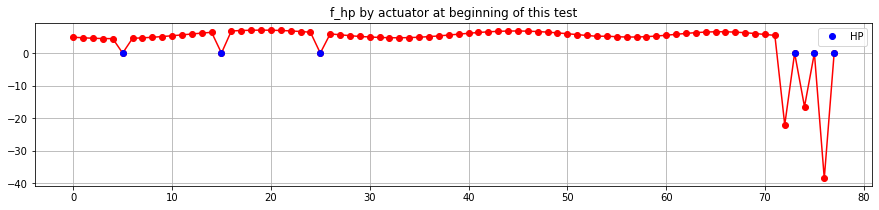

In [59]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['f_hp'][0,:],'-ro')
plt.plot(data['hp'][0]-1, data['f_hp'][0,data['hp'][0]-1],'bo',label='HP') #color HP with blue
plt.grid()
plt.legend()
plt.title('f_hp by actuator at beginning of this test')
print('sum = %.2f N'%sum(data['f_hp'][0,:]))

In [60]:
data['f_hp'].shape

(13200, 78)

#### When we looked at the GUI, it appeared that F_CMD - F_CUR - F_HC = F_ERROR. Is that always true?
It is true, except for the hardpoints

act#6, F_HC[0] = 0.00, residual[0] = 4.47
act#16, F_HC[0] = 0.00, residual[0] = 6.62
act#26, F_HC[0] = 0.00, residual[0] = 6.17


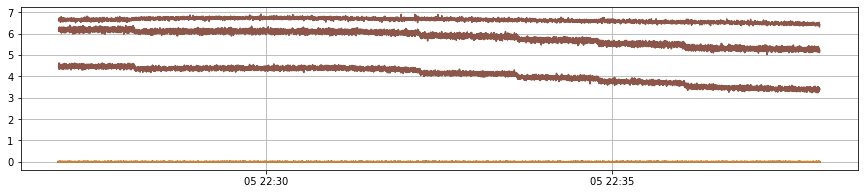

In [61]:
plotID = range(72) #nonHP #
fig, ax = plt.subplots(figsize=(15,3))
for i in plotID:
    aa = data['f_cmd'][:,i] - data['force'][:,i] - data['f_hp'][:,i]-data['f_error'][:,i]#-data['f_delta'][:,i]
    plt.plot(t, aa)
    if (aa[0]>4) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()

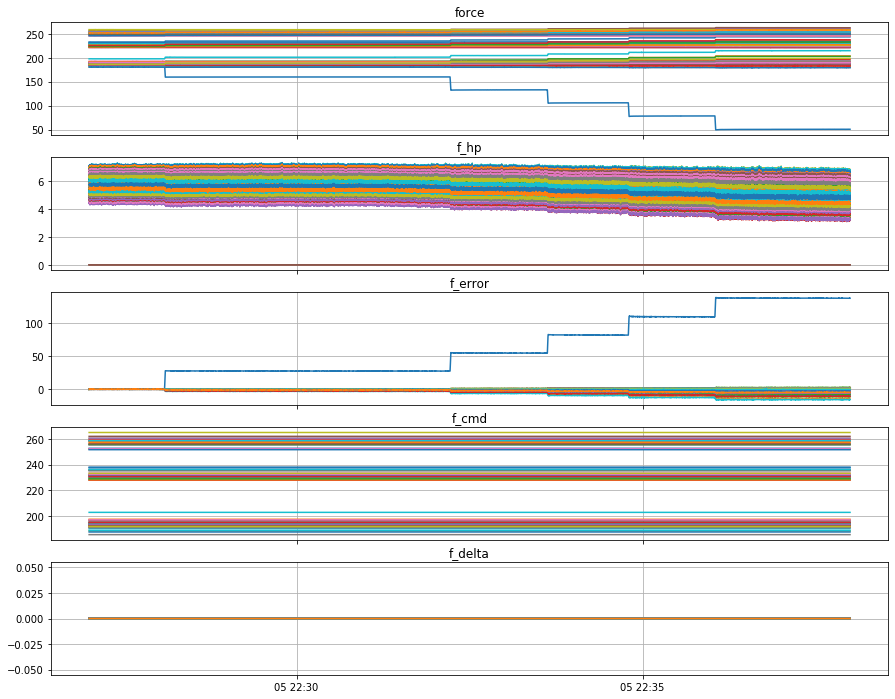

In [62]:
plotID = range(72) #nonHPa #
fig, ax = plt.subplots(5,1, sharex=True, figsize=(15,12))
for i in plotID:
    ax[0].plot(t, data['force'][:,i] )
ax[0].grid()
ax[0].set_title('force')

for i in plotID:
    ax[1].plot(t, data['f_hp'][:,i] )
ax[1].grid()
ax[1].set_title('f_hp')

for i in plotID:
    ax[2].plot(t, data['f_error'][:,i] )
ax[2].grid()
ax[2].set_title('f_error')

for i in plotID:
    ax[3].plot(t, data['f_cmd'][:,i] )
ax[3].grid()
ax[3].set_title('f_cmd')

for i in plotID:
    ax[4].plot(t, data['f_delta'][:,i] )
ax[4].grid()
ax[4].set_title('f_delta');
#fig.subplots_adjust(hspace=0)

In [63]:
df = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,piston,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,thetaZPosition,xPosition,xTilt,yPosition,yTilt
2020-03-05 22:27:00.042000+00:00,0.084669,1,1.583447e+09,37859,1.583447e+09,c3c6bc7d,5562637,1.583447e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:27:00.090000+00:00,0.084669,1,1.583447e+09,37859,1.583447e+09,c3c6bc7d,5562646,1.583447e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:27:00.140000+00:00,0.084669,1,1.583447e+09,37859,1.583447e+09,c3c6bc7d,5562655,1.583447e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:27:00.189000+00:00,0.084669,1,1.583447e+09,37859,1.583447e+09,c3c6bc7d,5562664,1.583447e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:27:00.241000+00:00,0.084669,1,1.583447e+09,37859,1.583447e+09,c3c6bc7d,5562675,1.583447e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07


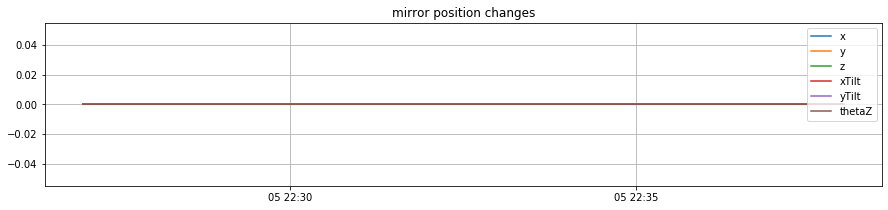

In [64]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xPosition-df.xPosition[0], label='x')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yPosition-df.yPosition[0], label='y')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.piston-df.piston[0], label='z')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xTilt-df.xTilt[0], label='xTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yTilt-df.yTilt[0], label='yTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.thetaZPosition-df.thetaZPosition[0], label = 'thetaZ')
plt.title('mirror position changes')
plt.legend()
plt.grid();

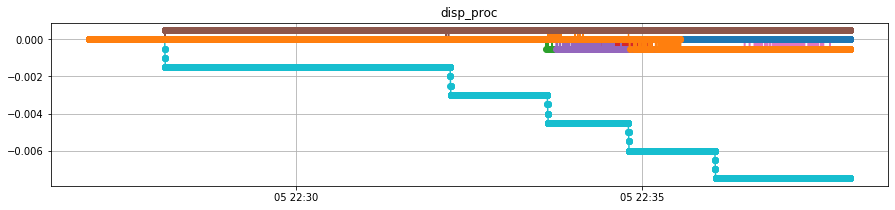

In [65]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(12):
    plt.plot(t, data['disp_proc'][:,i]-data['disp_proc'][0,i],'-o')
plt.title('disp_proc')
plt.grid()

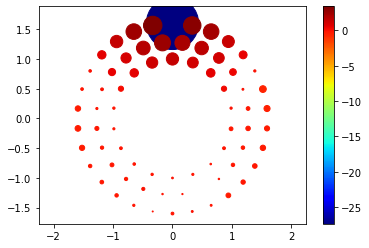

In [67]:
aa = data['force'][2000,:72]- data['force'][0,:72] 
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.axis('equal')
plt.colorbar();

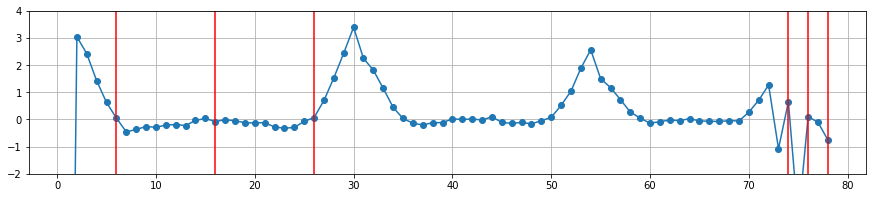

In [68]:
x0 = np.linspace(1,78,78)
aa = data['force'][2000,:]- data['force'][0,:] 
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(x0,aa,'-o')
plt.grid()
yy=[-2, 4]
plt.ylim(yy)
for i in data['hp'][0]:
    plt.plot([i,i],yy,'-r')
#ax.set_xticklabels(actLabels)

In [69]:
aa = pd.read_csv('CtrlParameterFiles_2018-07-19_104314_surg/Kdc_Matrix_Params.csv', skiprows=8, header=None)
kdc = np.array(aa)[:,-1].reshape(aa[0][len(aa)-1],-1)
fdc = kdc*(-27.31/502.4) #kdc is in steps/N. fdc (force decoupling matrix, see correctability pdf page 41) is in N/N.
#see a01*ipynb: -27.31N = +502.4 steps (open loop)
aa = insertHPColumns(fdc.transpose())
fdc = aa.transpose()

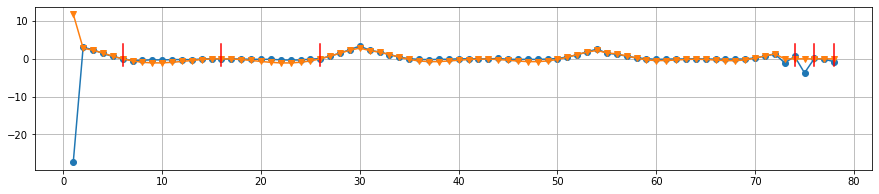

In [77]:
x0 = np.linspace(1,78, 78)
aa = data['force'][2000,:]- data['force'][0,:] 
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(x0,aa,'-o')
plt.plot(x0, fdc[:,0]*10,'-v')
#plt.plot(-kdc[:,0]*20/50, '-v')
plt.grid()
yy=[-2, 4]
#yy=[-3, 25]
#plt.ylim(yy)
for i in data['hp'][0]:
    plt.plot([i,i],yy,'-r')
#ax.set_xticklabels(actLabels)

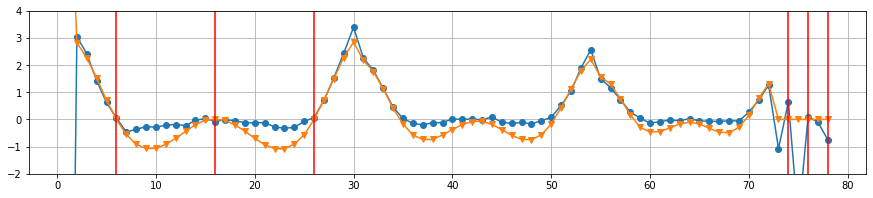

In [78]:
x0 = np.linspace(1,78, 78)
aa = data['force'][2000,:]- data['force'][0,:] 
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(x0,aa,'-o')
plt.plot(x0, fdc[:,0]*10,'-v')
#plt.plot(-kdc[:,0]*20/50, '-v')
plt.grid()
yy=[-2, 4]
#yy=[-3, 25]
plt.ylim(yy)
for i in data['hp'][0]:
    plt.plot([i,i],yy,'-r')
#ax.set_xticklabels(actLabels)

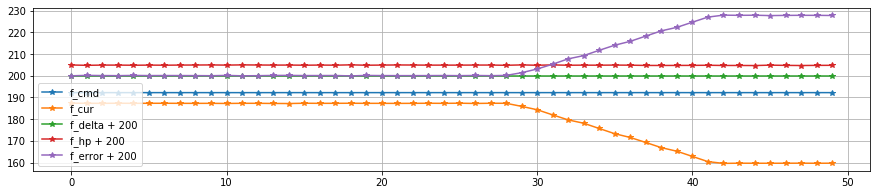

In [36]:
fig, ax = plt.subplots(figsize=(15,3))
i = 0
idx = range(1280,1330)
#aa = data['f_cmd'][idx,i] - data['force'][idx,i] -data['f_error'][idx,i] #- data['f_hp'][:,i]#
#plt.plot(aa,'-o')
plt.plot(data['f_cmd'][idx,i],'-*', label = 'f_cmd')
plt.plot(data['force'][idx,i],'-*', label = 'f_cur')
plt.plot(data['f_delta'][idx,i]+200,'-*', label = 'f_delta + 200')
plt.plot(data['f_hp'][idx,i]+200,'-*', label = 'f_hp + 200')
plt.plot(data['f_error'][idx,i]+200,'-*', label = 'f_error + 200')
plt.legend()
if (aa[0]>10) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()

### Observations from above:
* When we incur a force change by command stroke of an actuator, f_cmd doesn't change.
* But the system does sense a change in force, so the FB system responds to that.

### This is our understanding from this test:
* stroke = position = encoder reading
* stroke is proportional to steps and encoder, 
    * each micron is 50 steps, 410 encoder count
* stroke is inversely proportional to forces (at least when M2 faces down)
    * each micron is 2.7N
* M2 FB system seems to be working, but f_hp is confusing, so are f_error and f_delta.
* f_cmd is the LUT forces. Proof in a03_LUT_0.ipynb
* f_cur is the measured force (simply called "force" in binary file)
* https://github.com/lsst-ts/ts_mtm2/blob/master/configuration/lsst-m2/config/system/cell/actuator_configuration_data/A_Model_14902-1000_SN_001.xml
    * for S/N=001, 1.99675366010000E-5 mm/step, 8.19562539783576 counts/step